<a href="https://colab.research.google.com/github/vishalkumarsingh999/Machin-Learning/blob/master/Assingement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explotary Data Anaylsis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from  statsmodels import robust

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [77]:
df=pd.read_csv('https://raw.githubusercontent.com/vishalkumarsingh999/Machin-Learning/master/haberman.csv')
print(df.head())
print(df.columns)
print(df.shape)
print(df['status'].value_counts())

print(df.describe())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
Index(['age', 'year', 'nodes', 'status'], dtype='object')
(306, 4)
1    225
2     81
Name: status, dtype: int64
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


# Our Objetive is to Analysis the  relationship among all attribute.
#This Dataset have data of Breast Cancer Patcient
## Here This dataset consist of 3 indepentend variable, eg.
##1)age of paticient, 
##2)year of opertion 1900+Value,
##3)No. of Cancer Node was there,
#And one Dependand Variable eg.
##4)Satus : is patcent Serive for 5 year or more after operation => 1 , if not then => 2 
#Objective: To determine whether patcient serival for 5 year+ or not 


# Uni Variable Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



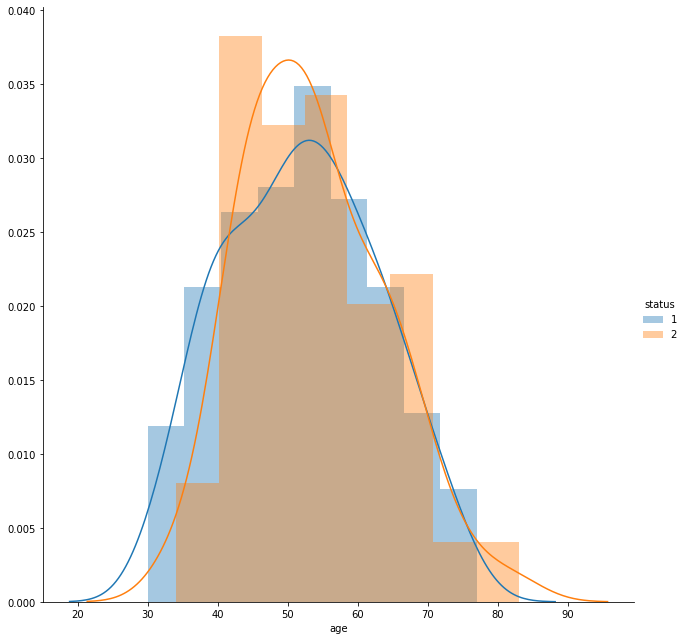

In [50]:
sns.FacetGrid(df,hue='status',size=9).map(sns.distplot,'age').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



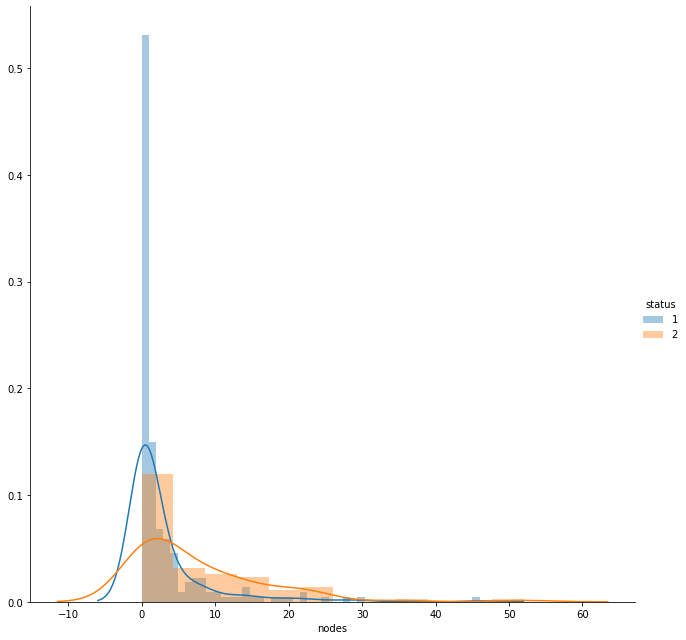

In [51]:
sns.FacetGrid(df,hue='status',size=9).map(sns.distplot,'nodes').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



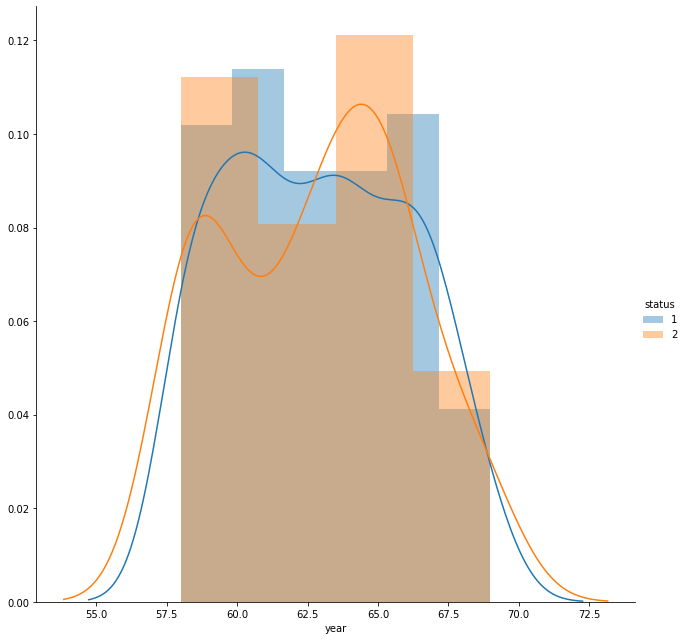

In [52]:
sns.FacetGrid(df,hue='status',size=9).map(sns.distplot,'year').add_legend()

In [58]:
status1=df.loc[df['status']==1]
status2=df.loc[df['status']==2]

## for age

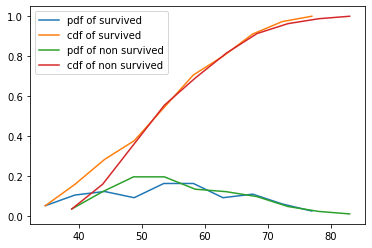

[38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


In [81]:
counts,bin_edges=np.histogram(status1['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(status2['age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of non survived','cdf of non survived'])
plt.show()
print(bin_edges[1:])

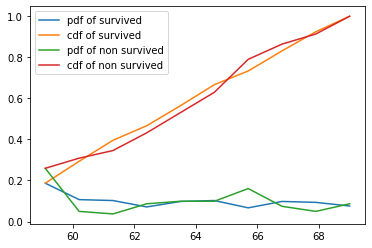

In [71]:
counts,bin_edges=np.histogram(status1['year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(status2['year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of non survived','cdf of non survived'])
plt.show()

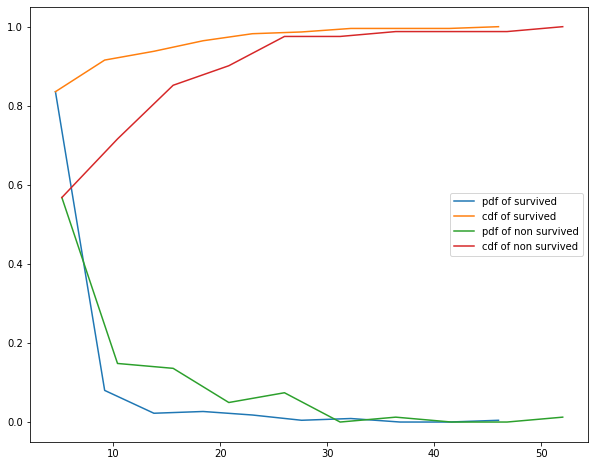

In [75]:
counts,bin_edges=np.histogram(status1['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(status2['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of non survived','cdf of non survived'])
plt.show()

# Concusation of Uni variable analysis
##year of operation and age is operlaping pdf so both of them are not so usefull variables to conclude 
#but 
##we can say then if patient age is less then 38.9  then there is high chance of servival
#and
##chaces of survival is bit high if year of operation is between 1960 and 1962 but chance of survival if less between year of operation 1965 and 1967 
## 'nodes' column has is informative as it can be observed that 85% of survivers are have less then 5 nodes AND 55% of non servival are also have less then 5 nodes.

# statistics of the dataset:

In [78]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#BoxPlot

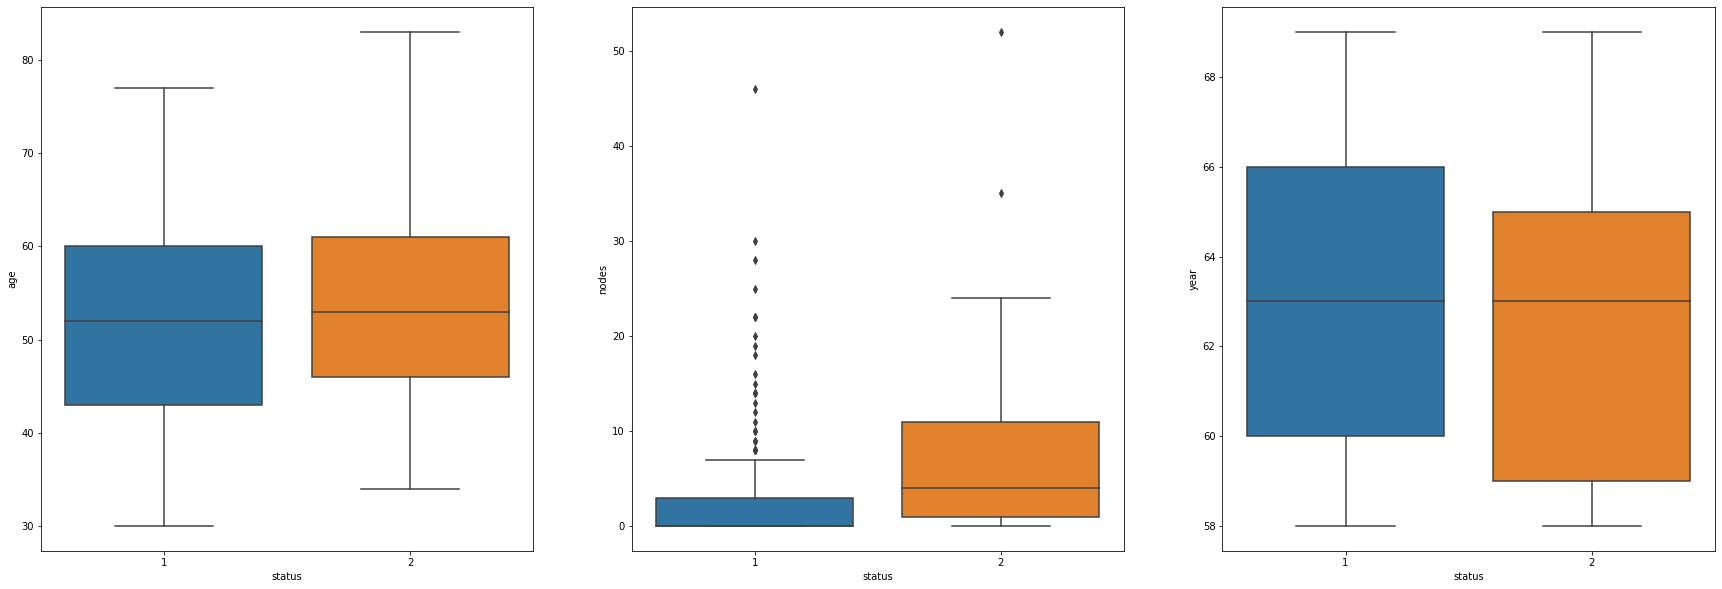

In [88]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.boxplot(x='status',y='age',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='status',y='nodes',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='status',y='year',data=df)
plt.show()  

#concluation 
##NOde chances of servival of patient is if they have less then 3 node and low chance less then 50 percentile of long servival

#violin Plot

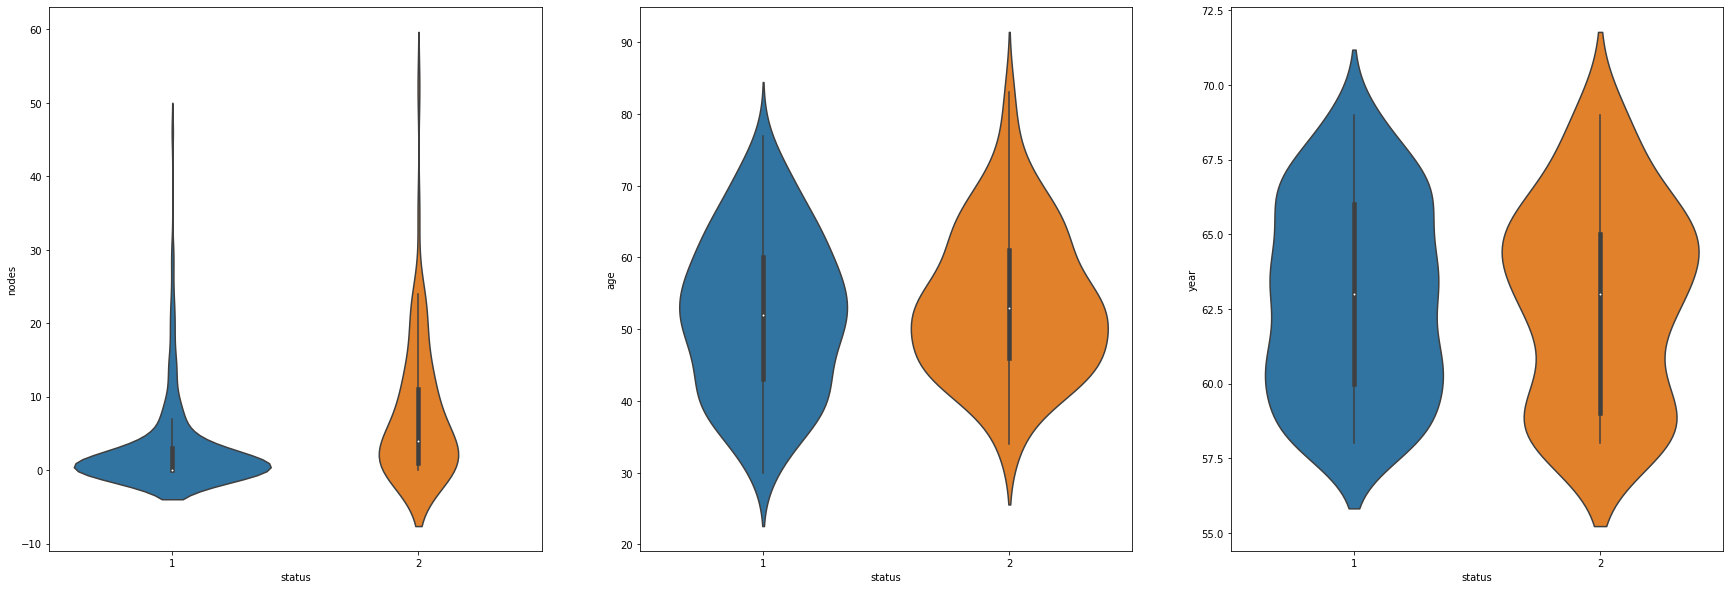

In [98]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.violinplot(data=df,x='status',y='nodes',size=30)
plt.subplot(1,3,2)
sns.violinplot(data=df,x='status',y='age',size=30)
plt.subplot(1,3,3)
sns.violinplot(data=df,x='status',y='year',size=30)

#Bi variabe analysis
## join plot and pair plot

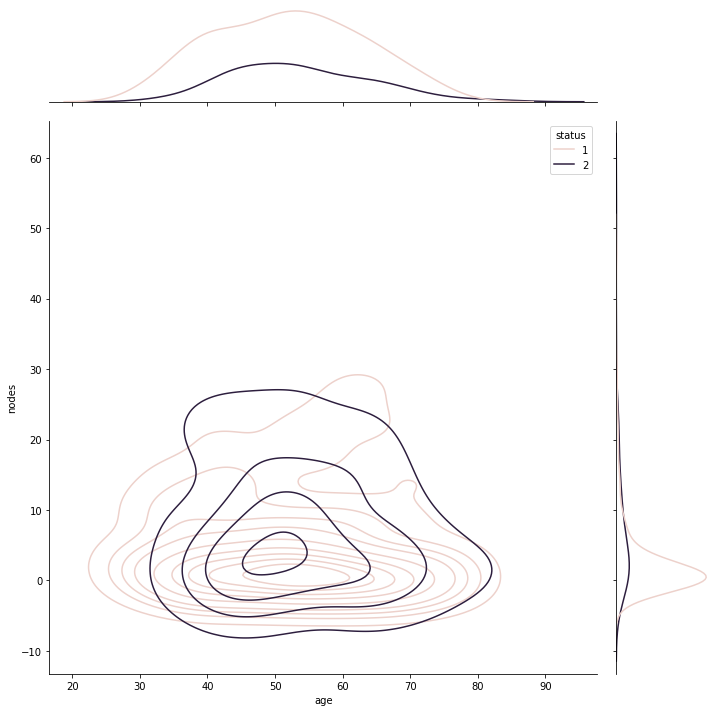

In [100]:
sns.jointplot(data=df,x='age',y='nodes',hue='status',kind='kde',height=10)

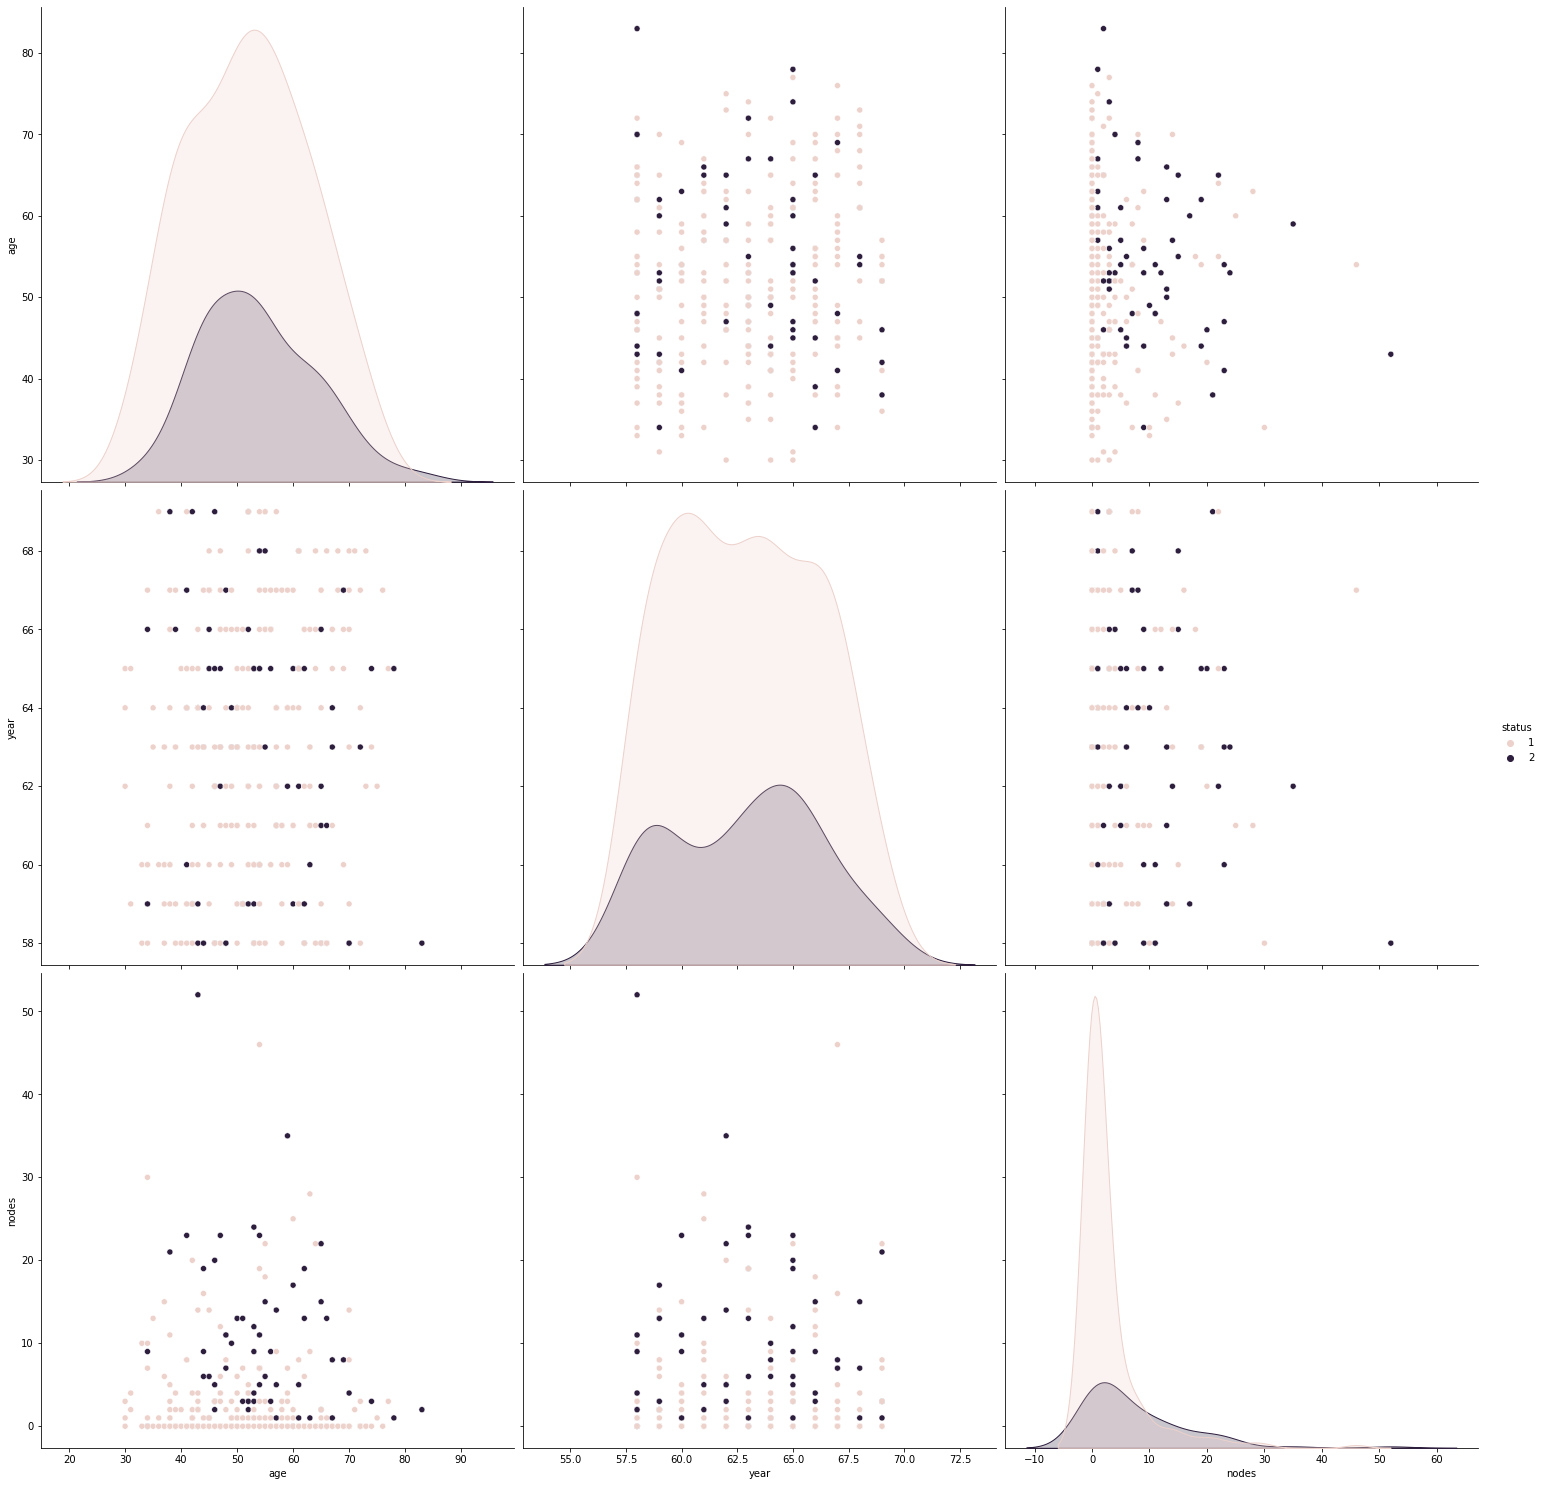

In [109]:
sns.pairplot(df,hue='status',height=7,diag_kind='kde')

In [107]:
px.scatter_3d(df,x='age',y='nodes',z='year',color='status',symbol='status',opacity=0.75)

In [108]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [114]:
status1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [116]:
status2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [112]:
print('Median  of servivers\n')
print('Age',np.median(status1['age']))
print('Year',np.median(status1['year']))
print('Nodes:',np.median(status1['nodes']))


Median  of servivers

Age 52.0
Year 63.0
Nodes: 0.0


In [113]:
print('Median  of non servivers\n')
print('Age',np.median(status2['age']))
print('Year',np.median(status2['year']))
print('Nodes:',np.median(status2['nodes']))


Median  of non servivers

Age 53.0
Year 63.0
Nodes: 4.0


In [110]:
print('Median Absoluate Deviation of servivers\n')
print('Age',robust.mad(status1['age']))
print('Year',robust.mad(status1['year']))
print('Nodes:',robust.mad(status1['nodes']))


Median Absoluate Deviation of servivers

Age 13.343419966550417
Year 4.447806655516806
Nodes: 0.0


In [111]:
print('Median Absoluate Deviation of Non servivers\n')
print('Age',robust.mad(status2['age']))
print('Year',robust.mad(status2['year']))
print('Nodes:',robust.mad(status2['nodes']))


Median Absoluate Deviation of Non servivers

Age 11.860817748044816
Year 4.447806655516806
Nodes: 5.930408874022408


#Concusation
`if node<3 and age <40 then there is very high chances of survival `
#and
`if node>4 and age between 45 and 65 then very less change of survial`